## Assignment 2: Classification 

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [3]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [5]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Question 2: /5 pts

Split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [9]:
# Assuming 'Class' is the target variable and all other columns are predictors
X = df[['Amount']]  # Predictor variables
y = df['Class']  # Outcome/response variable

# Split the data into 50% train and 50% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  

In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** 
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** 
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** 


## Question 4: /15 pts

- Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

- Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. 

- Then **make a scatter-plot of `Amount` and `Outcome` on your test data** and add the class prediction (0 or 1, using `predict`) and the predicted probability of a positive outcome (using `predict_proba`). Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1).

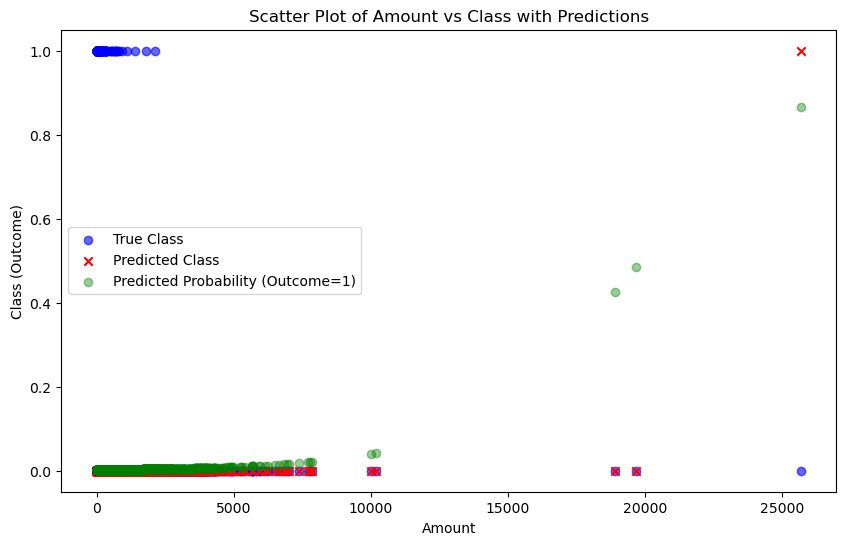

In [10]:
# Create LogisticRegression instance with max_iter set to suppress convergence warnings
log_reg = LogisticRegression(max_iter=10000)

# Run logistic regression on 'Amount' as the predictor and 'Class' as the outcome
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_class = log_reg.predict(X_test)  # Predicted class (0 or 1)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Predicted probability of Outcome=1

# Create a scatter plot for Amount and Outcome on the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Amount'], y_test, label='True Class', c='blue', alpha=0.6)
plt.scatter(X_test['Amount'], y_pred_class, label='Predicted Class', marker='x', c='red')
plt.scatter(X_test['Amount'], y_pred_proba, label='Predicted Probability (Outcome=1)', marker='o', c='green', alpha=0.4)

# Add labels and title
plt.xlabel('Amount')
plt.ylabel('Class (Outcome)')
plt.title('Scatter Plot of Amount vs Class with Predictions')
plt.legend()
plt.show()

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** 

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:** 

* Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.

**YOUR ANSWER HERE:** 

## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

**YOUR ANSWER HERE:** 

## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** 

* Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

**YOUR ANSWER:** 

# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** 

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** 


# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

**YOUR ANSWER:** 
